# Банки - Анализ оттока клиентов

### Описание проекта

Банк «Метанпром» располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В последнее время в банке очень сильно повысился отток клиентов, это становится критичной проблемой, которая угрожает существованию банка. 

На данный момент отделу маркетинга требуется максимально точная информация о сегментации клиентов банка. Результаты планируют использовать для того, чтобы зачсет маркетингового воздействия на эти сегменты уменьшить отток клиентов. 

Цель: Проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка

Задачи: 

- Провести исследовательский анализ данных;
- Выделить портреты клиентов, которые склонны уходить из банка;
- Сформулировать и проверить статистические гипотезы.

### Описание данных 

*userid* — идентификатор пользователя,

*score* — баллы кредитного скоринга,

*city* — город,

*gender* — пол,

*age* — возраст,

*equity* — приблизительная оценка собственности клиента,

*balance* — баланс на счёте,

*products* — количество продуктов, которыми пользуется клиент,

*credit_card* — есть ли кредитная карта,

*last_activity* — был ли клиент активен последнее время,

*est_salary* — заработная плата клиента

*churn* — уходит или нет.

## Загрузка данных и изучение общей информации

In [1]:
#Импортирую необходимые для работы билиоетки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go 
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Чтение файла bank_scrooge.csv с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
#Моя стандартная функция для ознакомления с данными
def info_data(data):
    display(data.head(10)) #Выведет первые 10 строк датафрейма
    display(data.info()) #Выведет общую информацию о таблице
    print('Количество пропусков:', data.isnull().sum()) #Покажет количество пропусков
    print('Количество дубликатов:',data.duplicated().sum()) #Покажет количество будликатов соответственно
    
info_data(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

Количество пропусков: USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64
Количество дубликатов: 0


В датасете 10 000 строк, есть 1 явный дубликат т.е. после удаления дубликата будет доступна информация о 9999 клиентах. 

Всего у нас 12 столбцов, в которых содержится информация о клиентах. Не все названия столбцов корректные: например, USERID, EST_SALARY необходимо будет их переименовать, привести к нижнему регистру, записать по правилам.  

Пропуски есть только в столбце balance - это баланс на счете. 

Кажется, что в столбце score в данных после запятой содержатся только нули, если это так (нужно проверить), то эти данные можно привести к типу int64, убрать ненужные хвостики. 

## Предобработка данных

### Переименование столбцов

Как я уже ранее выяснила, некорректные названия у столбцов USERID, EST_SALARY. Запишу их в нижнем регистре с применением змеиного

In [4]:
#Переименовываю
df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Удаление дубликатов

In [5]:
#Удаляю явный дубликат и проверяю
df = df.drop_duplicates()
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Также, думаю, что нужно проверить на дубликаты отдельно столбец user_id, т.к. он должен содержать только уникальные значение без повторов:

In [6]:
#Проверяю
df.duplicated(subset = ['user_id']).sum()

73

Т.е., у нас также есть неявные дубликаты - это пользователи, id которых задвоились, но, видимо, отсальная информация отличается. 
Считаю, что эти дубли тоже нужно удалить, т.к. это совсем небольшое количество от общего числа пользователей. 

In [7]:
#Удалю и проверю
df = df.drop_duplicates(subset = ['user_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9927 non-null   int64  
 1   score          9927 non-null   float64
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1008.2+ KB


Таким образом, после удаления явных и неявных дубликатов в датасете осталась информация о 9927 клиентах банка.

### Обработка пропущенных значений

Пропущенные значения видим только в столбце balance, в нем содержится информация о балансе денежных средств на счете. 
Удалять их точно некорректно, т.к. пропусков достаточно много и это серьезно повлияет на результаты исследования.

Поэтому попробую посмотреть на этих клиентов в разрезе других показателей, возможно, получится найти какие-то закономерности, которые помогут решить, нужно ли заполнить или оставить пропуски без изменений. 

In [8]:
#Просмотрю статистическую сводку по каждому столбцу с помощью метода describe()
df.describe(include = "all")

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9927.000000,9927.000000,9927,9927,9923.000000,9927.000000,7.667000e+03,9927.000000,9927.000000,9927.000000,9.927000e+03,9927.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5856,4972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,171739.076257,848.735973,NaN,NaN,42.729215,2.634633,8.289016e+05,1.871562,0.679863,0.523522,1.478914e+05,0.183338
std,33696.488963,65.392866,NaN,NaN,12.177008,1.979286,1.985272e+06,0.792955,0.466552,0.499472,1.393658e+05,0.386963
min,94561.000000,642.000000,NaN,NaN,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142720.000000,802.000000,NaN,NaN,33.000000,0.000000,2.952611e+05,1.000000,0.000000,0.000000,7.525178e+04,0.000000
50%,172651.000000,853.000000,NaN,NaN,40.000000,3.000000,5.248943e+05,2.000000,1.000000,1.000000,1.197114e+05,0.000000
75%,201160.500000,900.000000,NaN,NaN,51.000000,4.000000,9.808015e+05,2.000000,1.000000,1.000000,1.746733e+05,0.000000


In [9]:
#Просмотрю статистическую сводку по каждому столбцу с помощью метода describe() для клиентов, баланс которыхнеизвестен 
df[df['balance'].isna()].describe(include = "all")

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2260.000000,2260.000000,2260,2260,2260.000000,2260.000000,0.0,2260.000000,2260.000000,2260.000000,2.260000e+03,2260.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1449,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,171975.568584,865.334956,NaN,NaN,42.125664,0.051770,NaN,1.161504,0.815487,0.549115,2.267006e+05,0.005752
std,33277.188448,89.669447,NaN,NaN,11.953138,0.227525,NaN,0.401442,0.387988,0.497692,1.999817e+05,0.075642
min,114182.000000,642.000000,NaN,NaN,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143067.000000,871.000000,NaN,NaN,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.204570e+05,0.000000
50%,172498.500000,903.000000,NaN,NaN,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.747554e+05,0.000000
75%,201354.250000,922.000000,NaN,NaN,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.404518e+05,0.000000


Какие можно сделать выводы:
   
    - Баллы кредитного скоринга практически не отличаются;
    - Самое большое кличество клиентов находятся в Ярославле и в первом, и во втором случае;
    - Мужчин больше, чем женщин в обоих случаях;
    - Отличий по возврасту нет;
    - Наличие кредитной карты, активность также практически не отличаются для все выборки и выборки клиентов с неизвестным балансом. 

    - Клиенты с неизвестным балансом реже являются собственниками недвижимости;
    - Количество используемых продуктов банка среди них ниже; 
    - Зарплаты этой категории клиентов выше. 

В данном случае я не считаю, что будет корректно заполнять пропуски сердними или медианными значениями, т.к. это не та величина, которая зависит от других параметров, я не вижу корреляций и возможности корректно заполнить пропуски.

Некорректное заполнение может серьезно повлиять на результаты исследования, особенно, если учитывать, что количество пропусков довольно большое. 

Также проверю нет ли отклонений и "заглушек" в значениях других столбцов: age, products, credit_card, 	last_activity.

In [10]:
df['age'].unique()

array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

In [11]:
df['products'].unique()

array([2, 3, 1, 4, 5, 0], dtype=int64)

In [12]:
df['credit_card'].unique()

array([0, 1], dtype=int64)

In [13]:
df['last_activity'].unique()

array([1, 0], dtype=int64)

В целом видим, что в остальных столбцах все значения нормальные.


Также меня заинтересовало значение 0 в столбце products. 

Кажется, что если человек является клиентом банка, то он должен пользоваться хотя бы одним продуктом и такого значения быть не должно. 

Посмотрю, что это за клиенты, у которых нет продуктов банка и какое их количество. 

In [14]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Видим, что это всего 1 клиент, т.к. для анализа нам нужны клиенты, которые пользовались продуктами бранка и затем ушли, думаю, что лучше его удалить. Возможно, наличие такого значения связано с ошибкой заполнения данных. 

In [15]:
#Удаляю
df = df[df['products']!=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9926 non-null   int64  
 1   score          9926 non-null   float64
 2   city           9926 non-null   object 
 3   gender         9926 non-null   object 
 4   age            9922 non-null   float64
 5   equity         9926 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9926 non-null   int64  
 8   credit_card    9926 non-null   int64  
 9   last_activity  9926 non-null   int64  
 10  est_salary     9926 non-null   float64
 11  churn          9926 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1008.1+ KB


### Преобразование типов данных

In [16]:
#Проверяю значения в столбце score, как и планировала в первом блоке
df['score'].unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

Видим, что значения, действительно, не содержат сотых/десятых, поэтому значения в столбце округлю до целых и приведу к типу int64

In [17]:
#Меняю тип, проверяю
df = df.astype({'score': np.int64})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9926 non-null   int64  
 1   score          9926 non-null   int64  
 2   city           9926 non-null   object 
 3   gender         9926 non-null   object 
 4   age            9922 non-null   float64
 5   equity         9926 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9926 non-null   int64  
 8   credit_card    9926 non-null   int64  
 9   last_activity  9926 non-null   int64  
 10  est_salary     9926 non-null   float64
 11  churn          9926 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1008.1+ KB


### Выводы по блоку:

Изначально в датасете было 10 000 строк, 1 явный дубликат. Также в ходе предобработки на дубликаты был проверен столбец user_id, т.к. он должен содержать только уникальные значение без повторов. В итоге было найдено и удалено ещё 72 дуюликата. 

Всего в датасете - 12 столбцов, в которых содержится информация о клиентах. Не все названия столбцов были корректные: например, USERID, EST_SALARY. В ходе предобработки столбцы были переименованы, приведены к нижнему регистру, также записаны с учетом змеиного регистра.  

Пропущенные значения есть только в столбце balance, в нем содержится информация о балансе денежных средств на счете. 

Поскольку не было обнаружено каких-либо закономерностей по признакам клиентов, баланс которых не был указан, заполнить пропуски 
не получилось. Все-таки это не та величина, которая напрямую зависит от других параметров.

Некорректное заполнение, удаление пропусков может серьезно повлиять на результаты исследования, особенно, если учитывать, что количество пропусков довольно большое, поэтому приняла решение оставить их как есть. 

Также в столбце score тип данныех изменила на int64.

Таким образом, по итогу предобработки количество клиентов,на данных которых будем проводить исследование -  9926. 

В целом данные готовы к дальнейшей работы, по мере необходимости смогу что-то менять/добавлять в ходе исследования. 

## Исследовательский анализ данных

### Тепловая карта матрицы корреляций для количественных переменных

Построю тепловую карту матрицы корреляций для столбцов с количественными значениями: score, age, balance,est_salary

In [18]:
#Уберу из датафрейма лишние столбцы, чтобы на хитмэпе остались только нужные мне данные
corr_df = df.drop(columns = ['city','gender', 'equity', 'products','credit_card','last_activity'])
corr_df.head()

,user_id,score,age,balance,est_salary,churn
0,183012,850,25.0,59214.82,75719.14,1
1,146556,861,37.0,850594.33,86621.77,0
2,120722,892,30.0,NaN,107683.34,0
3,225363,866,51.0,1524746.26,174423.53,1
4,157978,730,34.0,174.00,67353.16,1


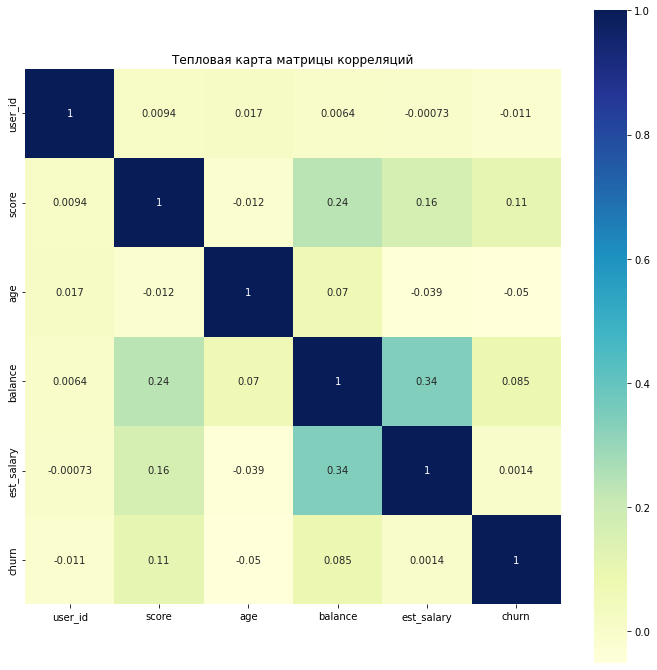

In [19]:
#Строю хитмэп
cmap = corr_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cmap, annot = True, square=True, cmap= 'YlGnBu')
plt.title('Тепловая карта матрицы корреляций');

В целом все признаки коррелируют с признаком churn (отток) незначительно. 

Самый высокий показатель корреляции с признаком score — баллы кредитного скоринга; т.е. чем выше баллы, тем выше вероятность того, что клиент попадет в отток. С учетом шкалы Чеддока зависимость прямая, слабая. 

### Корреляция Спирмена для категориальных переменных

Посчитаем корреляцию для категориальных переменных методом Спирмена:

In [20]:
from scipy.stats import spearmanr
for column in ['city','gender', 'equity', 'products','credit_card','last_activity']:
    rho, p = spearmanr( df[column], df['churn']) #Считаем корреляцию Спирмена и p-value
    print('Ранговая корреляция Спирмена', column, rho) #Напечатать ранговая корреляция Спирмена и p-значение
    print('p-значение', column, p)

Ранговая корреляция Спирмена city 0.017958383933544063
p-значение city 0.07359864976634894
Ранговая корреляция Спирмена gender 0.14158417728978254
p-значение gender 1.2969318457987584e-45
Ранговая корреляция Спирмена equity 0.26784791851816503
p-значение equity 1.111855761801253e-162
Ранговая корреляция Спирмена products 0.27219925238263365
p-значение products 3.773554770393501e-168
Ранговая корреляция Спирмена credit_card -0.1305074935924475
p-значение credit_card 5.826560599921932e-39
Ранговая корреляция Спирмена last_activity 0.16977561886248874
p-значение last_activity 4.417380668205432e-65


Также видим, что все признаки коррелируют с признаком churn (отток) незначительно. 

Самые высокие показатели корреляции с признаками equity — приблизительная оценка собственности клиента, products — количество продуктов, которыми пользуется клиент. По шкале Чеддока - зависимость прямая, слабая.

### Сравнение количества оставшихся и ушедших из банка клиентов по признакам

Теперь я собираюсь сравнить количество оставшихся и ушедших из банка клиентов по каждому признаку: score, city, gender, age	equity и т.д. 

In [21]:
#Заменю значения в столбце churn, чтобы презентации были понятнее
def churn_name(churn):
    '''Возвращает название группы'''
    if churn == 0:
        return 'Оставшиеся'
    if churn == 1:
        return 'Ушедшие'

df['churn'] = df['churn'].apply(churn_name)
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,Ушедшие
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,Оставшиеся
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,Оставшиеся
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,Ушедшие
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,Ушедшие


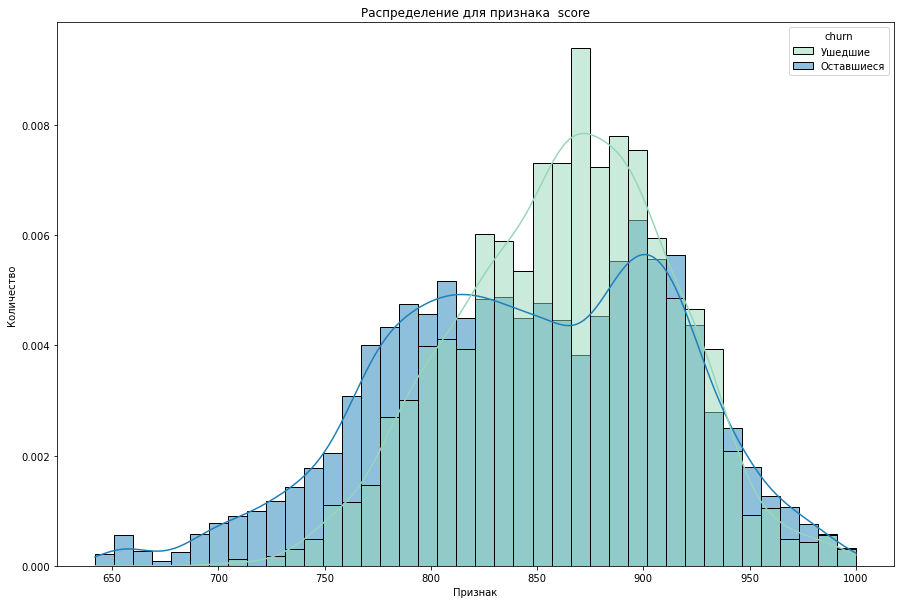

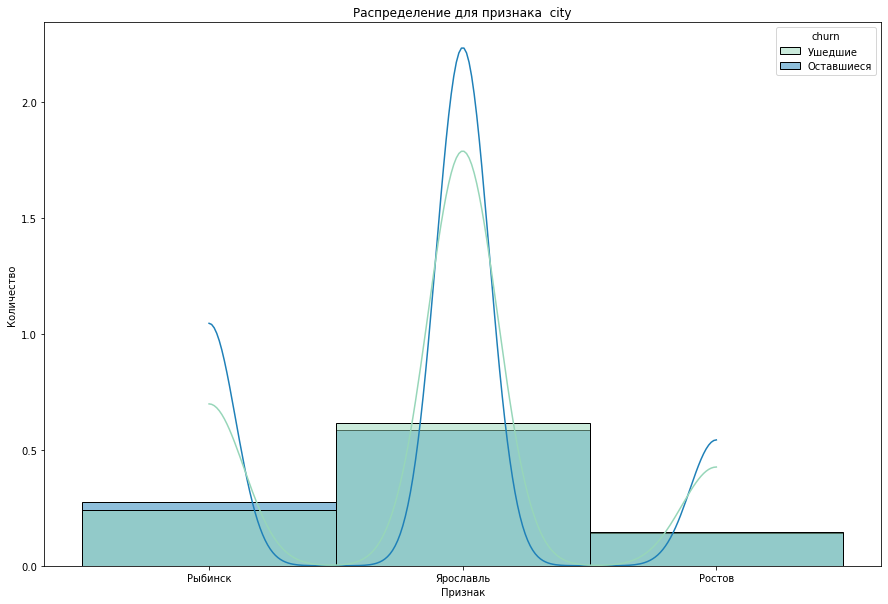

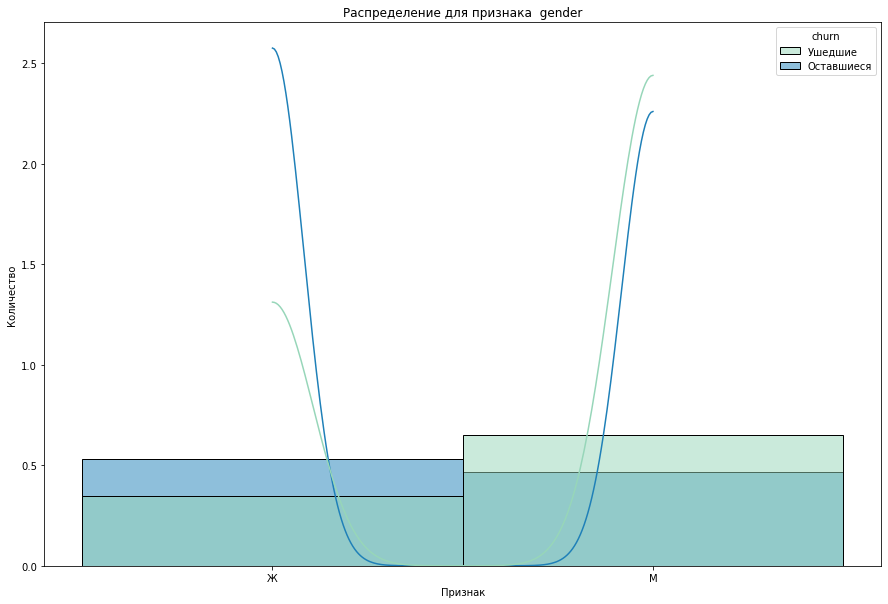

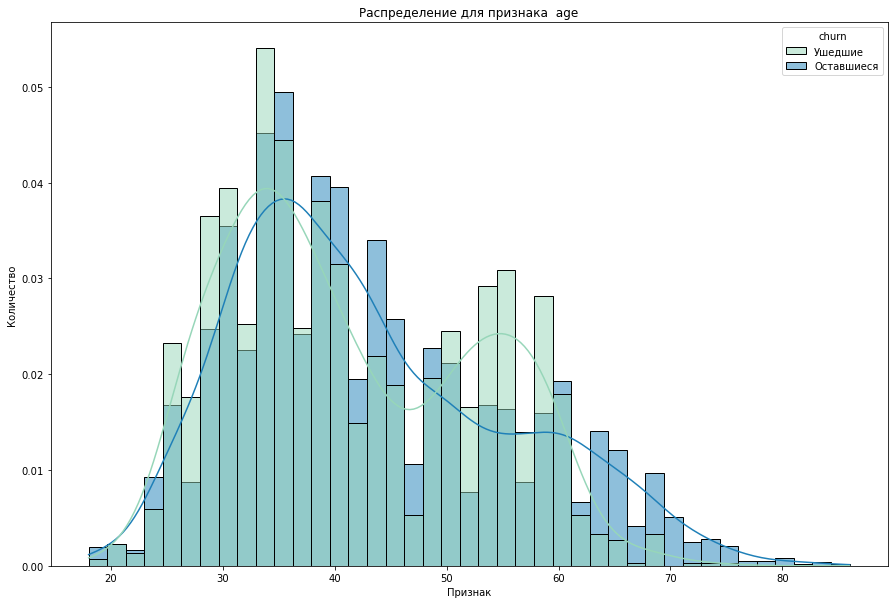

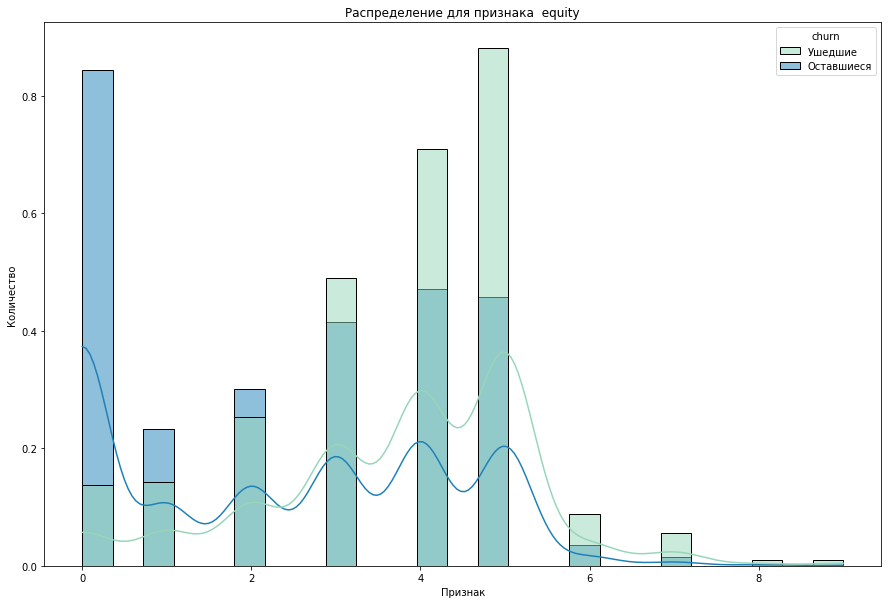

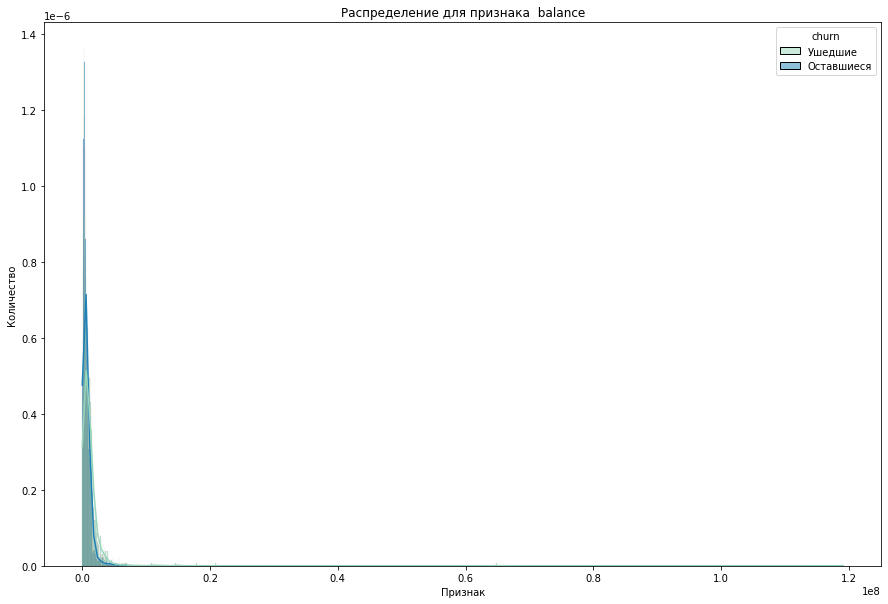

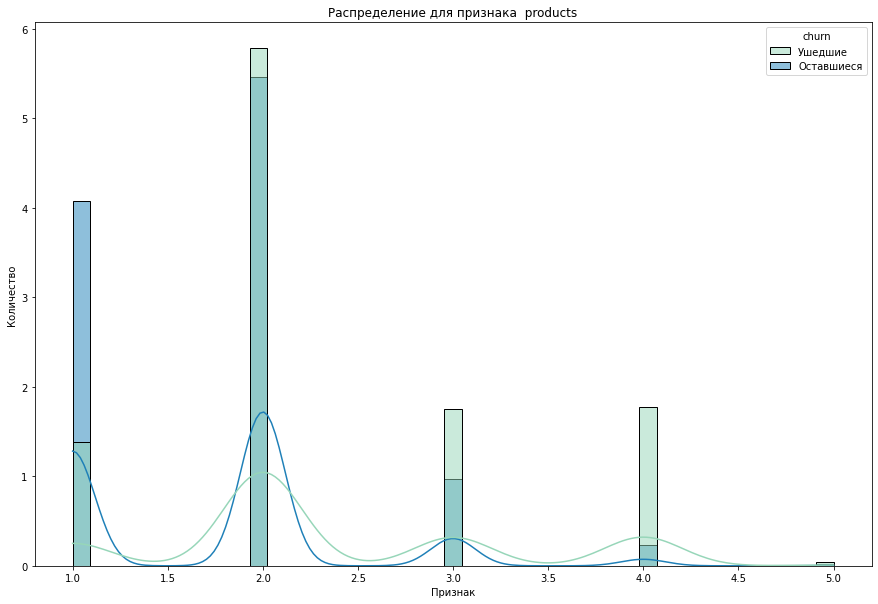

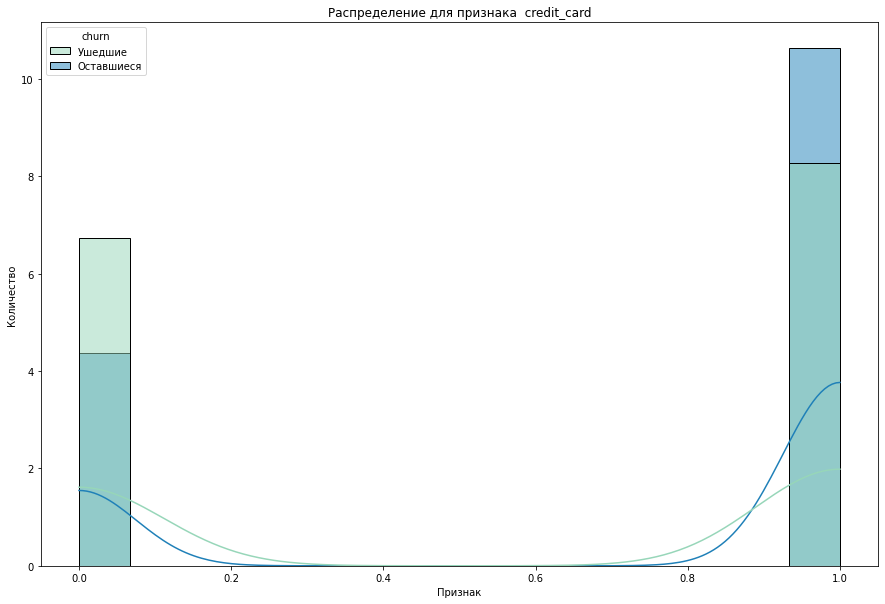

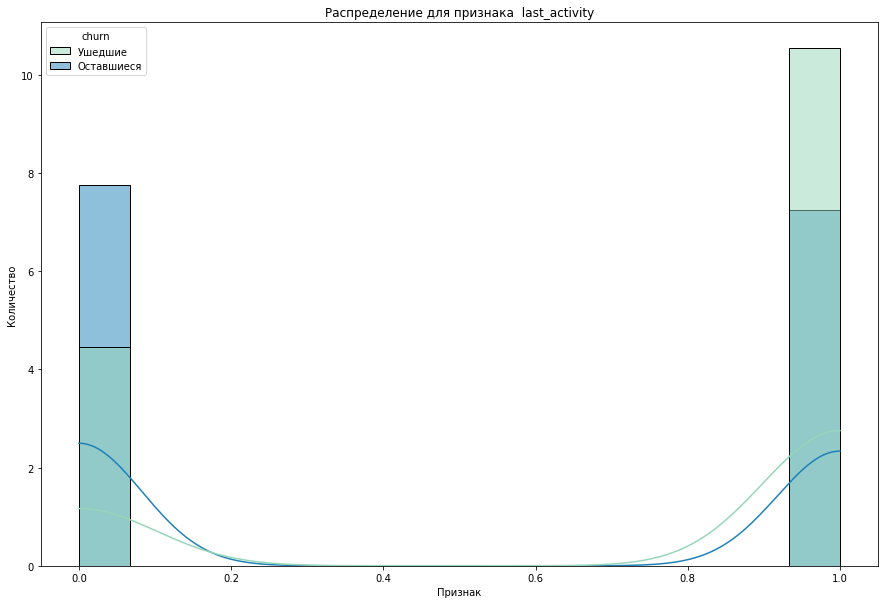

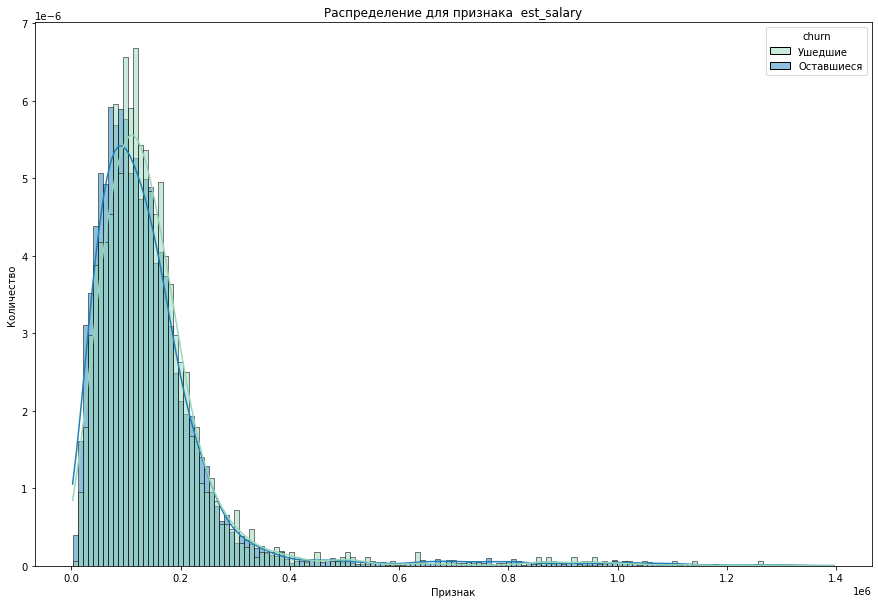

In [22]:
for column in ['score', 'city', 'gender','age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary']:
    plt.figure(figsize=(15, 10))
    sns.histplot(x = df[column], hue='churn', data=df, common_norm = False, stat = 'density', palette = 'YlGnBu', kde = bool)
    plt.title('Распределение для признака ' + ' ' + column, fontsize=12)
    plt.xlabel('Признак')
    plt.ylabel('Количество')
    plt.show()

Для признака balance гистограмма не очень показательна, посмотрю подробнее

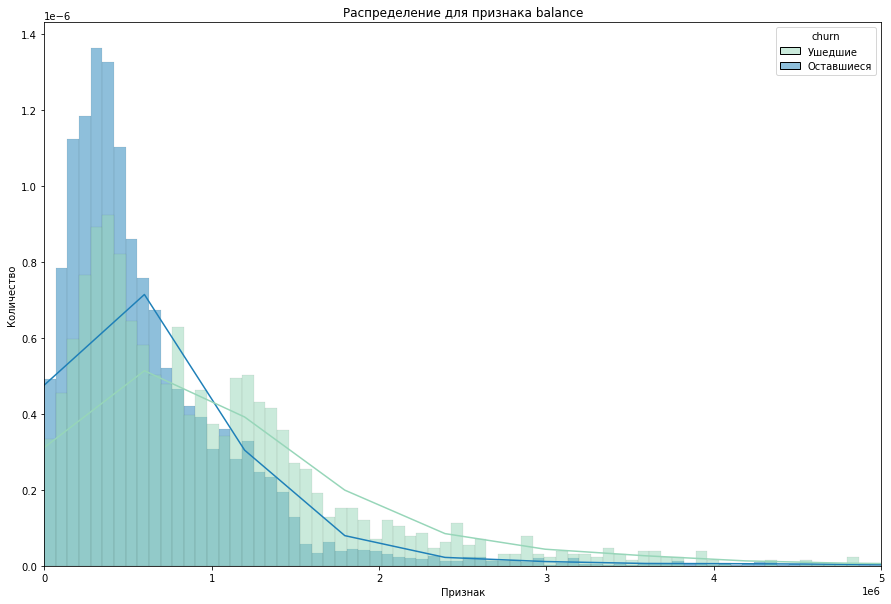

In [23]:
plt.figure(figsize=(15, 10))
sns.histplot(x = df['balance'], hue='churn', data=df, common_norm = False, stat = 'density', palette = 'YlGnBu', kde = bool)
plt.xlim([0, 5000000])
plt.title('Распределение для признака balance', fontsize=12)
plt.xlabel('Признак')
plt.ylabel('Количество')
plt.show()

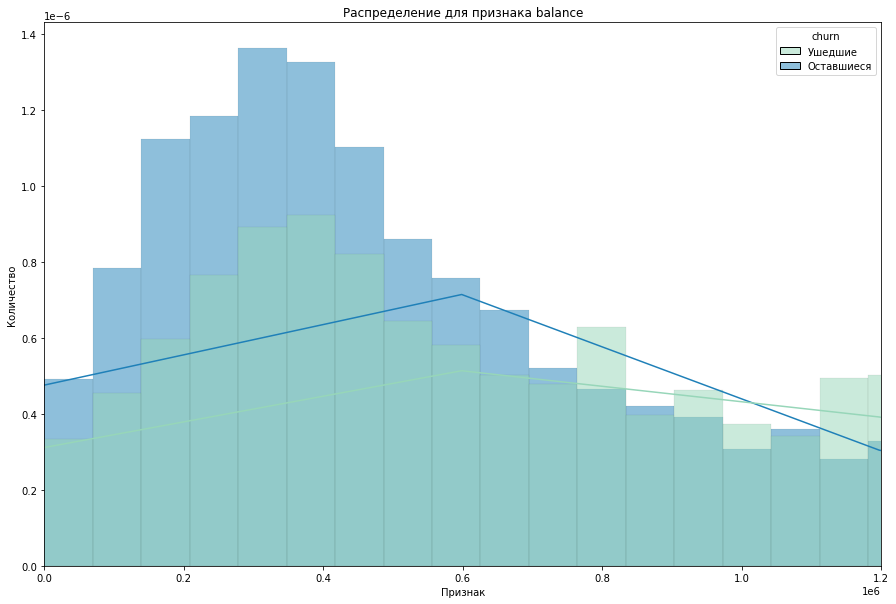

In [24]:
plt.figure(figsize=(15, 10))
sns.histplot(x = df['balance'], hue='churn', data=df, common_norm = False, stat = 'density', palette = 'YlGnBu', kde = bool)
plt.xlim([0, 1200000])
plt.title('Распределение для признака balance', fontsize=12)
plt.xlabel('Признак')
plt.ylabel('Количество')
plt.show()

Для признака est_salary тоже смотрю подробнее

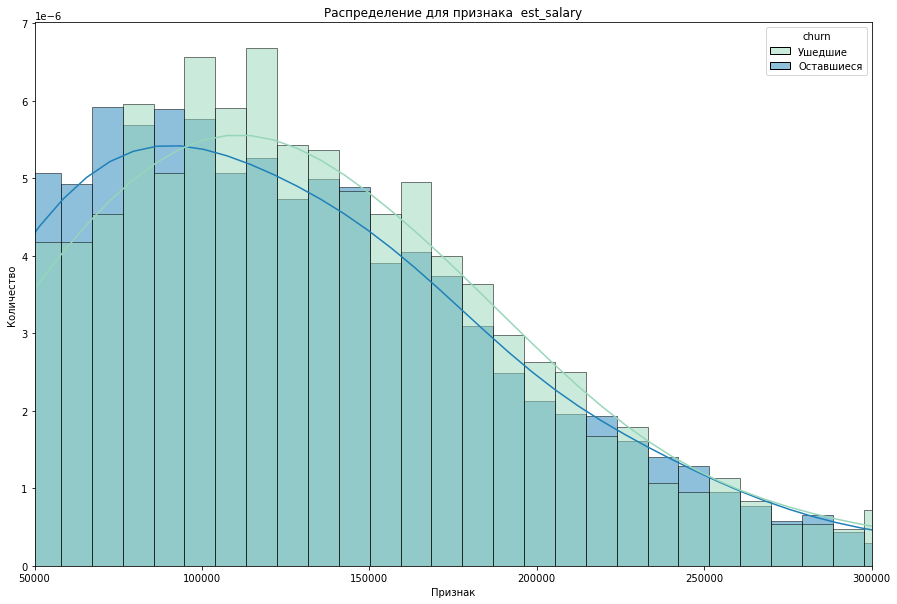

In [25]:
plt.figure(figsize=(15, 10))
sns.histplot(x = df['est_salary'], hue='churn', data=df, common_norm = False, stat = 'density', palette = 'YlGnBu', kde = bool)
plt.xlim([50000, 300000])
plt.title('Распределение для признака  est_salary', fontsize=12)
plt.xlabel('Признак')
plt.ylabel('Количество')
plt.show()

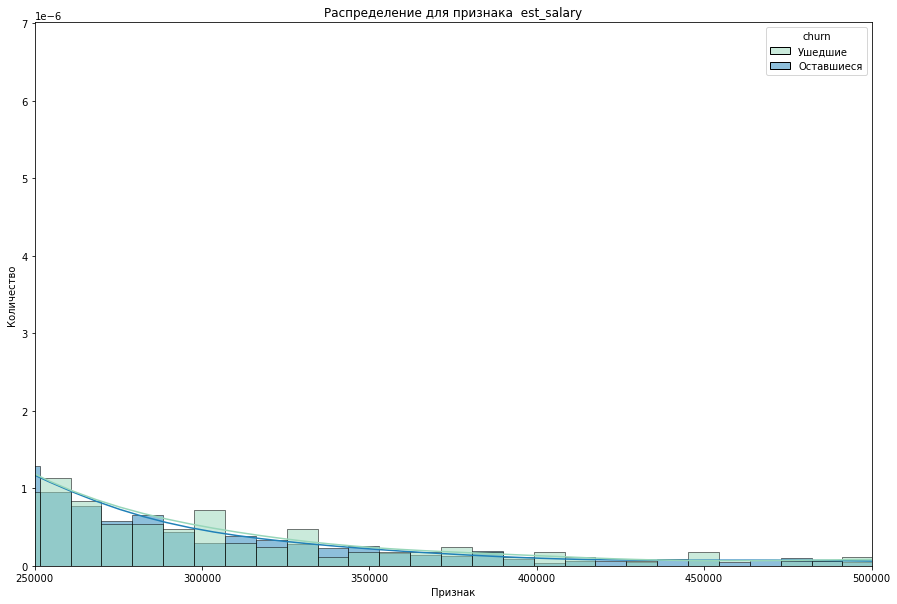

In [26]:
plt.figure(figsize=(15, 10))
sns.histplot(x = df['est_salary'], hue='churn', data=df, common_norm = False, stat = 'density', palette = 'YlGnBu', kde = bool)
plt.xlim([250000, 500000])
plt.title('Распределение для признака  est_salary', fontsize=12)
plt.xlabel('Признак')
plt.ylabel('Количество')
plt.show()

Гистограммы помогают определить пирзнаки, характерные для ушедших и оставшихся клиентов, таким образом, мы уже видим черты клиентов, склонных к оттоку:
 - По признаку score склонны к оттоку клиенты с уровнем кредитного рейтинга 825 - 910 балллов и 920 - 935.

 - По признаку city склонны к оттоку клиенты из Ярославля.

 - По признаку gender склонны к оттоку мужчины.

 - По признаку age склонны к оттоку возрастные группы: 24-35 лет, 50-61 год. 

 - По признаку equity склонны к оттоку клиенты, собственность которых оценивается выше 3 баллов. 

 - По признаку balance склонны к оттоку клиенты, на балансе которых примерно 760-840 т.р.; 910 - 1050 т.р.; свыше 1120 т.р.

 - По признаку products склонны к оттоку клиенты, которые используют от 2 продуктов банка, наиболее - 4 продукта. 

 - По признаку credit_card склонны к оттоку клиенты, не оформившие кредитную карту. 

 - По признаку last_activity склонны к оттоку клиенты, которые были активны и использовали продукты банка в последнее время. 

 - По признаку est_salary склонны к оттоку клиенты с зарплатами 90 - 140 т.р., 150 - 215 т.р.
 

### Выводы по блоку

В основном все признаки коррелируют с признаком churn (отток) незначительно. 

Самый высокий показатель корреляции Пирсона с признаком score — баллы кредитного скоринга; т.е. чем выше баллы, тем выше вероятность того, что клиент попадет в отток.

Самые высокие показатели корреляции Спирмена с признаками equity — приблизительная оценка собственности клиента, products — количество продуктов, которыми пользуется клиент. 

Во всех случаях зависимость оценивается по шкале Чеддока как прямая и слабая.

Что касается распределения клиентов оттока и оставшихся по признакам:

 - По признаку score склонны к оттоку клиенты с уровнем кредитного рейтинга 825 - 910 балллов и 920 - 935.

 - По признаку city склонны к оттоку клиенты из Ярославля.

 - По признаку gender склонны к оттоку мужчины.

 - По признаку age склонны к оттоку возрастные группы: 24-35 лет, 50-61 год. 

 - По признаку equity склонны к оттоку клиенты, собственность которых оценивается выше 3 баллов. 

 - По признаку balance склонны к оттоку клиенты, на балансе которых примерно 760-840 т.р.; 910 - 1050 т.р.; свыше 1120 т.р.

 - По признаку products склонны к оттоку клиенты, которые используют от 2 продуктов банка, наиболее - 4 продукта. 

 - По признаку credit_card склонны к оттоку клиенты, не оформившие кредитную карту. 

 - По признаку last_activity склонны к оттоку клиенты, которые были активны и использовали продукты банка в последнее время. 

 - По признаку est_salary склонны к оттоку клиенты с зарплатами 90 - 140 т.р., 150 - 215 т.р.
 
 Таким образом, у нас есть понимание о характерных для клиентов оттока признаках.
 
 Их следует учитывать при формировании портретов. 
 

## Статистический анализ данных

Т.к. будем сравнивать данные дух выборок: оставшихся клиентов и ушедших, основной датасет разделю на 2 по признаку оттока:

In [27]:
churn_df = df[df['churn'] == 'Ушедшие']
churn_df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,Ушедшие
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,Ушедшие
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,Ушедшие
12,132970,845,Ярославль,Ж,31.0,3,591928.52,2,1,1,112697.16,Ушедшие
40,129705,811,Рыбинск,М,34.0,2,129799.35,1,0,0,96242.71,Ушедшие


In [28]:
active_df = df[df['churn'] == 'Оставшиеся']
active_df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,Оставшиеся
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,Оставшиеся
5,202305,856,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,Оставшиеся
6,177259,807,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,Оставшиеся
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,Оставшиеся


### Гипотеза 1. Гипотеза  различия дохода между клиентами, которые ушли/остались

Нулевая гипотеза: средний доход клиента из оттока равен среднему доходу оставшегося клиента.

Альтернативная гипотеза: средний доход клеинтов отличается.

Критический уровень статистической значимости задам на уровне общепринятого порогового значения — 5%.

Использовать для проверки гипотезы буду метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [29]:
alpha = .05
results = st.ttest_ind(churn_df ['est_salary'], active_df['est_salary'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.8796213894730411
Не получилось отвергнуть нулевую гипотезу


Вывод: по итогу проверки гипотезы делаем вывод, что средний доход клиента из оттока равен среднему доходу оставшегося клиента.

### Гипотеза 2.  Гипотеза различия количества используемых продуктов между клиентами, которые ушли/остались

Нулевая гипотеза: среднее количество используемых продуктов клиентом из оттока равно среднему количеству продуктов, которое использует оставшийся клиент.

Альтернативная гипотеза: среднее количество используемых продуктов отличается.

Критический уровень статистической значимости задам на уровне общепринятого порогового значения — 5%.

Использовать для проверки гипотезы буду метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [30]:
alpha = .05
results = st.ttest_ind(churn_df['products'], active_df['products'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 7.964667361392785e-139
Отвергаем нулевую гипотезу


Вывод: По итогу проверки гипотезы делаем вывод, что среднее количество продуктов, которое используют клиенты из оттока не равно среднему количеству продуктов, которое использует оставшийся клиент. 

In [31]:
print('Среднее количество продуктов, используемых клиентом оттока:', churn_df['products'].describe()['mean'])
print('Среднее количество продуктов у оставшихся клиентов:', active_df['products'].describe()['mean'])

Среднее количество продуктов, используемых клиентом оттока: 2.377130291368884
Среднее количество продуктов у оставшихся клиентов: 1.758356975453312


### Гипотеза 3.  Гипотеза различия количества баллов кредитного скоринга между клиентами, которые ушли /остались 

Нулевая гипотеза: среднее количество баллов кредитного скоринга у клиентов из оттока равно среднему количеству баллов кредитного скоринга, оставшихся клиентов.

Альтернативная гипотеза: среднее количество количества баллов кредитного скоринга отличается.

Критический уровень статистической значимости задам на уровне общепринятого порогового значения — 5%.

Использовать для проверки гипотезы буду метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [32]:
alpha = .05
results = st.ttest_ind(churn_df['score'], active_df['score'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 2.525891079515767e-37
Отвергаем нулевую гипотезу


По итогу проверки гипотезы делаем вывод, что среднее количество баллов кредитного скоринга, у клиентов из оттока не равно среднему количеству баллов кредитного скоринга, оставшихся клиентов.

In [33]:
print('Среднее количество баллов кредитного скоринга у клиентов оттока:', churn_df['score'].describe()['mean'])
print('Среднее количество баллов кредитного скоринга у оставшихся клиентов:', active_df['score'].describe()['mean'])

Среднее количество баллов кредитного скоринга у клиентов оттока: 863.346893897746
Среднее количество баллов кредитного скоринга у оставшихся клиентов: 845.4436906377205


### Гипотеза 4.  Гипотеза различия оценки собственности между клиентами, которые ушли /остались 

Нулевая гипотеза: средняя оценка собственности клиентов из оттока равна средней оценке собственности оставшихся клиентов.

Альтернативная гипотеза: средняя оценка собственности отличается.

Критический уровень статистической значимости задам на уровне общепринятого порогового значения — 5%.

Использовать для проверки гипотезы буду метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [34]:
alpha = .05
results = st.ttest_ind(churn_df['equity'], active_df['equity'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 8.694555982492184e-196
Отвергаем нулевую гипотезу


По итогу проверки гипотезы делаем вывод, что средняя оценка собственности клиентов из оттока не равна средней оценке собственности оставшихся клиентов.

In [35]:
print('Средняя оценка собственности клиентов оттока:', churn_df['equity'].describe()['mean'])
print('Средняя оценка собственности оставшихся клиентов:', active_df['equity'].describe()['mean'])

Средняя оценка собственности клиентов оттока: 3.7641561297416164
Средняя оценка собственности оставшихся клиентов: 2.381152090785741


### Гипотеза 5.  Гипотеза различия возраста между клиентами, которые ушли /остались 

Нулевая гипотеза: средний возраст клиентов из оттока равен среднему возрасту оставшихся клиентов.

Альтернативная гипотеза: средний возраст клиентов отличается.

Критический уровень статистической значимости задам на уровне общепринятого порогового значения — 5%.

Использовать для проверки гипотезы буду метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [36]:
alpha = .05
results = st.ttest_ind(churn_df['age'], active_df['age'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: nan
Не получилось отвергнуть нулевую гипотезу


По итогу проверки гипотезы делаем вывод, средний возраст клиентов из оттока не равен среднему возрасту оставшихся клиентов.

In [37]:
print('Средний возраст клиентов оттока:', churn_df['age'].describe()['mean'])
print('Среднийвозраст оставшихся клиентов:', active_df['age'].describe()['mean'])

Средний возраст клиентов оттока: 41.42959295929593
Среднийвозраст оставшихся клиентов: 43.01628825271471


### Выводы по блоку

Были проверены 5 гипотез:
    
Гипотеза различия дохода между между клиентами, которые ушли /остались

Гипотеза различия количества используемых продкутов между между клиентами, которые ушли /остались

Гипотеза различия количества баллов кредитного скоринга между между клиентами, которые ушли /остались

Гипотеза различия оценки собственности между клиентами, которые ушли /остались

Гипотеза различия возраста между клиентами, которые ушли /остались

Для проверки гипотез критический уровень статистической значимости задавала на уровне общепринятого порогового значения — 5%, использовала метод  метод scipy.stats.ttest_ind (array1, array2, equal_var).

В 4 из 5 случаев нулевая гипотеза была отвергнута. 

По итогу проверки гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались пришли к выводу, что  средний доход клиента из оттока равен среднему доходу оставшегося клиента.

По итогу проверки гипотезы различия количества используемых продуктов делаем вывод, что среднее количество продуктов, которое используют клиенты из оттока не равно среднему количеству продуктов, которое использует оставшийся клиент.

По итогу проверки гипотезы различия количества баллов кредитного скоринга делаем вывод, что  среднее количество баллов кредитного скоринга, у клиентов из оттока не равно среднему количеству баллов кредитного скоринга, оставшихся клиентов.

По итогу проверки гипотезы различия оценки собственности делаем вывод, что средняя оценка собственности клиентов из оттока не равна средней оценке собственности оставшихся клиентов.

По итогу проверки гипотезы различия возраста делаем вывод, что средний возраст клиентов из оттока не равен среднему возрасту оставшихся клиентов.

Таким образом, при формировании портретов немаловажно учитывать показатели: products, score, equity, age.


## Формирование портретов пользователей, склонных к оттоку

### Портрет №1

Мужчины и женщины до 50 лет с кредитным рейтингом от 825 баллов

Используют от 2 продуктов банка и были активны в последнее время

На балансе более 800 т.р.

In [38]:
#Делаю срез по выбранным параметрам, сохраняю в новый датафрейм
p1_df = df.query('age < 50 and balance >= 800000 and score > 825 and last_activity == 1 and products >=2') 
print('Количество клиентов в портрете:', len(p1_df))

Количество клиентов в портрете: 582


In [47]:
#Покажу процент оттока на круговой диаграмме
fig = go.Figure(
    data = [go.Pie(labels= p1_df['churn'].unique(), values = p1_df['churn'].value_counts())])
fig.show()

### Портрет №2

Мужчины и женщины в возрасте от 50 лет.

Собственность которых оценивается на 3 балла и выше. 

Без оформленнных кредитных карт.

In [40]:
#Делаю срез по выбранным параметрам, сохраняю в новый датафрейм
p2_df = df.query('age >= 50 and equity >= 3 and credit_card == 0') 
print('Количество клиентов в портрете:', len(p2_df))

Количество клиентов в портрете: 743


In [41]:
#Покажу процент оттока на круговой диаграмме
fig = go.Figure(
    data = [go.Pie(labels= p2_df['churn'].unique(), values = p2_df['churn'].value_counts())])
fig.show()

### Портрет №3

Мужчины и женщины до 50 лет

На балансе менее 800000  р.,  кредитный рейтинг - больше 825 баллов

In [42]:
#Делаю срез по выбранным параметрам, сохраняю в новый датафрейм
p3_df = df.query('age < 50 and balance < 800000 and score > 825') 
print('Количество клиентов в портрете:', len(p3_df))

Количество клиентов в портрете: 1970


In [43]:
fig = go.Figure(
    data = [go.Pie(labels= p3_df['churn'].unique(), values = p3_df['churn'].value_counts())])
fig.show()

### Портрет № 4

Мужчины из Ярославля

Собственность которых оценивается в 3 и более баллов. 

In [44]:
#Делаю срез по выбранным параметрам, сохраняю в новый датафрейм
p4_df = df.query('gender == "М" and city == "Ярославль" and equity > 3') 
print('Количество клиентов в портрете:', len(p4_df))

Количество клиентов в портрете: 1190


In [45]:
fig = go.Figure(
    data = [go.Pie(labels= p4_df['churn'].unique(), values = p4_df['churn'].value_counts())])
fig.show()

### Приоритизация портретов

Если учитывать порядок убывания доли клиентов в оттоке, то получим следующую приоритизацию:
    
1 место - **Портрет № 3**

Мужчины и женщины до 50 лет

На балансе менее 800000  р.,  кредитный рейтинг - больше 825 баллов

2 место - **Портрет № 2**

Мужчины и женщины в возрасте от 50 лет.

Собственность которых оценивается на 3 балла и выше. 

Без оформленнных кредитных карт.

3 место - **Портрет № 1**

Мужчины и женщины до 50 лет с кредитным рейтингом от 825 баллов

Используют от 2 продуктов банка и были активны в последнее время

На балансе более 800 т.р.

4 место - **Портрет № 4**

Мужчины из Ярославля

Собственность которых оценивается в 3 и более баллов.

## Общие выводы

В рамках исследования были изучены характеристики клиентов банка склонных и не склонных к оттоку, их взаимосвязь и влияение на отточность клиентов.

В основном все признаки коррелируют с признаком churn (отток) незначительно. 

Самый высокий показатель корреляции Пирсона признак churn (отток) имеет с признаком score (баллы кредитного скоринга).

Самые высокие показатели корреляции Спирмена признак churn (отток) имеет  с признаками equity (приблизительная оценка собственности клиента), products (количество продуктов, которыми пользуется клиент). 

По шкале Чеддока зависимость между этими признаками оценивается как прямая и слабая.

По итогам исследовательского анализа удалось выделить следующие признаки, характерные для отточных клиентов:

 - По признаку score склонны к оттоку клиенты с уровнем кредитного рейтинга 825 - 910 балллов и 920 - 935.

 - По признаку city склонны к оттоку клиенты из Ярославля.

 - По признаку gender склонны к оттоку мужчины.

 - По признаку age склонны к оттоку возрастные группы: 24-35 лет, 50-61 год. 

 - По признаку equity склонны к оттоку клиенты, собственность которых оценивается выше 3 баллов. 

 - По признаку balance склонны к оттоку клиенты, на балансе которых примерно 760-840 т.р.; 910 - 1050 т.р.; свыше 1120 т.р.

 - По признаку products склонны к оттоку клиенты, которые используют от 2 продуктов банка, наиболее - 4 продукта. 

 - По признаку credit_card склонны к оттоку клиенты, не оформившие кредитную карту. 

 - По признаку last_activity склонны к оттоку клиенты, которые были активны и использовали продукты банка в последнее время. 

 - По признаку est_salary склонны к оттоку клиенты с зарплатами 90 - 140 т.р., 150 - 215 т.р.
 
Эти признаки учитываю при формировании портретов клиентов. 

Также в ходе исследования были проверены 5 гипотез, чтобы сравнить признаки между клиентами из оттока и оставшимися на обслуживании в банке:

 - По итогу проверки гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались пришли к выводу, что средний доход клиента из оттока равен среднему доходу оставшегося клиента.

 - По итогу проверки гипотезы различия количества используемых продуктов делаем вывод, что среднее количество продуктов, которое используют клиенты из оттока не равно среднему количеству продуктов, которое использует оставшийся клиент.

 - По итогу проверки гипотезы различия количества баллов кредитного скоринга делаем вывод, что среднее количество баллов кредитного скоринга, у клиентов из оттока не равно среднему количеству баллов кредитного скоринга, оставшихся клиентов.

 - По итогу проверки гипотезы различия оценки собственности делаем вывод, что средняя оценка собственности клиентов из оттока не равна средней оценке собственности оставшихся клиентов.

 - По итогу проверки гипотезы различия возраста делаем вывод, что средний возраст клиентов из оттока не равен среднему возрасту оставшихся клиентов.

Таким образом, при формировании портретов также учитывала признаки: products, score, equity, age.

Мне удалось сформировать 4 портрета клиентов, с долей оттока от 60%. Описание портетов привожу в порядке убывания доли отточных клиентов:

1 место - **Портрет № 3**

Мужчины и женщины до 50 лет

На балансе менее 800000 р., кредитный рейтинг - больше 825 баллов

Самый высокоотточный сегмент: **Доля оттока - 75%**

2 место - **Портрет № 2**

Мужчины и женщины в возрасте от 50 лет.

Собственность которых оценивается на 3 балла и выше.

Без оформленнных кредитных карт.

**Доля оттока - 69,4%**

3 место - **Портрет № 1**

Мужчины и женщины до 50 лет с кредитным рейтингом от 825 баллов

Используют от 2 продуктов банка и были активны в последнее время

На балансе более 800 т.р.

**Доля оттока - 65,9%**

4 место - **Портрет № 4**

Мужчины из Ярославля

Собственность которых оценивается в 3 и более баллов.

**Доля оттока - 60,5%**

Если говорить о рекомендациях, то я бы выстраивала работу последовательно и сначала предложила обратить внимание на 2 первых самых высокоотточных портрета. 

Клиентам из Портрета № 3 (1 место по оттоку): мужчины и женщины до 50 лет, на балансе менее 800000 р., кредитный рейтинг - больше 825 баллов. Скорее всего могут быть интересны различные виды ипотек, сниженный первоначальный взнос,и более доступные процентные ставки. 

Клиентам из Портрета № 2 (2 место по оттоку): мужчины и женщины в возрасте от 50 лет, собственность которых оценивается на 3 балла и выше, без оформленнных кредитных карт могут быть интересны сниженные тарифы на обслуживание, нестандартные категории кэшбека, возможно, предложения по вкладам с интересным процентом. 